In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import collections

In [2]:
# r: 轮次: 含头轮。 等于人数
# m: 上限 （10000元）
# m': 竞标上限 （5000元）
# X: array. x_n： 第n次竞标的额度
# n： 第n轮


In [3]:
%%latex

$收入=(10000-x_i)(r-n)+10000(n-1)$
$\\$

$支出= \sum_{i=1}^{n-1} (10000-x_i) + 10000(r-n) $

<IPython.core.display.Latex object>

In [4]:
def receive(r,m,X,n):
    # r: 轮次: 含头轮
    # m: 上限 （10000元）
    # X: array. x_n： 第n次竞标的额度
    # n： 第n轮
    return (m-X[n-1])*(r-n)+m*(n-1)

def spend(r,m,X,n):
    # r: 轮次: 含头轮
    # m: 上限 （10000元）
    # X: array. x_n： 第n次竞标的额度
    # n： 第n轮
    return np.sum(m-np.asarray(X[:n-1]))+m*(r-n)

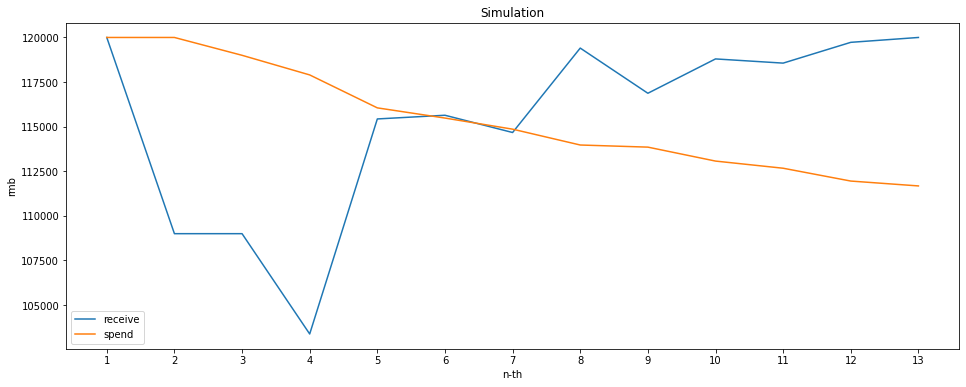

In [11]:
#模拟(可以改的)

r_sim=13  #总人数
m_sim=10000  #每轮标换上限
m=2000 #竞标上限
X_sim=[0]+list(np.random.choice(m,size=r_sim-2))+[0]  #大家竞标的钱
##竞标的钱
# X_sim=[0,1000,1100] +list(np.random.choice(m,size=r_sim-4))+ [0]
#X_sim=[0,2000.....0]

receive_sim=[]
spend_sim=[]
for i in range(1,r_sim+1):
    receive_sim.append(receive(r_sim,m_sim,X_sim,i))
    spend_sim.append(spend(r_sim,m_sim,X_sim,i))
    
plt.figure(figsize=(16,6))
plt.plot(range(1,r_sim+1),receive_sim,label="receive")
plt.plot(range(1,r_sim+1),spend_sim,label="spend")
plt.xticks(np.linspace(1,r_sim,r_sim))
plt.legend()
plt.title("Simulation")
plt.ylabel("rmb")
plt.xlabel("n-th");

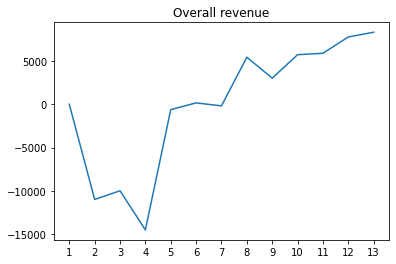

In [76]:
#总收入#
plt.plot(range(1,r_sim+1),np.asarray(receive_sim)-np.asarray(spend_sim))
plt.xticks(np.linspace(1,r_sim,r_sim))
plt.title("Overall revenue");

In [89]:
def tail_interest(r,m,X,n):
    # r: 轮次: 含头轮
    # m: 上限 （10000元）
    # X: array. x_n： 第n次竞标的额度
    # n： 第n轮
    
    net=((((m-X[n-1])*(r-n)+m*(n-1)-(sum([m-i for i in X[:n-1]])))))
    out=(r-n)*m
    
    print("第",n,"轮竞标者")
    print("竞标日前付了：",(sum([m-i for i in X[:n-1]])))
    print("竞标日当日净收入：",net)
    print("剩余",r-n,"轮")
    print("竞标日后付了：",out,"\n")
    
    
    return (out/net-1)/((r-n)*4)

第 1 轮竞标者
竞标日前付了： 0
竞标日当日净收入： 120000
剩余 12 轮
竞标日后付了： 120000 

第 2 轮竞标者
竞标日前付了： 10000
竞标日当日净收入： 99000
剩余 11 轮
竞标日后付了： 110000 

第 3 轮竞标者
竞标日前付了： 19000
竞标日当日净收入： 90000
剩余 10 轮
竞标日后付了： 100000 

第 4 轮竞标者
竞标日前付了： 27900
竞标日当日净收入： 75477
剩余 9 轮
竞标日后付了： 90000 

第 5 轮竞标者
竞标日前付了： 36053
竞标日当日净收入： 79379
剩余 8 轮
竞标日后付了： 80000 

第 6 轮竞标者
竞标日前付了： 45482
竞标日当日净收入： 70157
剩余 7 轮
竞标日后付了： 70000 

第 7 轮竞标者
竞标日前付了： 54859
竞标日当日净收入： 59813
剩余 6 轮
竞标日后付了： 60000 

第 8 轮竞标者
竞标日前付了： 63971
竞标日当日净收入： 55434
剩余 5 轮
竞标日后付了： 50000 

第 9 轮竞标者
竞标日前付了： 73852
竞标日当日净收入： 43020
剩余 4 轮
竞标日后付了： 40000 

第 10 轮竞标者
竞标日前付了： 83070
竞标日当日净收入： 35727
剩余 3 轮
竞标日后付了： 30000 

第 11 轮竞标者
竞标日前付了： 92669
竞标日当日净收入： 25893
剩余 2 轮
竞标日后付了： 20000 

第 12 轮竞标者
竞标日前付了： 101950
竞标日当日净收入： 17777
剩余 1 轮
竞标日后付了： 10000 

第 13 轮竞标者
竞标日前付了： 111677
竞标日当日净收入： 8323
剩余 0 轮
竞标日后付了： 0 



<ipython-input-89-b2b3feadb12d>:17: RuntimeWarning: divide by zero encountered in double_scalars
  return (out/net-1)/((r-n)*4)


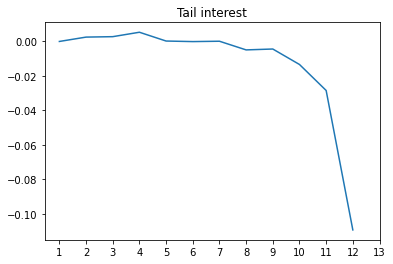

In [90]:
#尾部利率#
interest=[tail_interest(r_sim,m_sim,X_sim,i) for i in range(1,r_sim+1)]
plt.plot(range(1,r_sim+1),interest)
plt.xticks(np.linspace(1,r_sim,r_sim))
plt.title("Tail interest");

In [93]:
#利率
print([round(i,5) for i in interest])

[0.0, 0.00253, 0.00278, 0.00534, 0.00024, -8e-05, 0.00013, -0.0049, -0.00439, -0.01336, -0.02845, -0.10937, -inf]


In [ ]:
tail_interest(r_sim,m_sim,X_sim,2)